In [ ]:
#@author: Edson Angelo Carara (edson.carara@gmail.com)
#@title 1.0) Modulo 2 - Análise Exploratória de Dados

In [2]:
#@title 1.1) Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#@title 1.2) Definindo função para carregar os datasets de uma url
import zipfile
import requests
import io

def carregar_dataset_from_url(url_dataset:str, sep:str = ';', zipped:bool = False ):
  headers = {'User-Agent': 'Python', 'Accept': 'application/zip'}
  response = requests.get(url_dataset, headers=headers)
  file_data = response.content

  if response.status_code == 200:
      if zipped:
        with io.BytesIO(file_data) as file_buffer:
          # Abrindo o arquivo ZIP
          with zipfile.ZipFile(file_buffer) as zip:
              # Extraindo o arquivo CSV para a memória
              with zip.open(zip.namelist()[0]) as f:
                  df = pd.read_csv(f, sep=sep)
                  print(f'Dataset carregado com sucesso de {url_dataset}')
                  return df
      else:
        df = pd.read_csv(url_dataset, sep=sep)
        print(f'Dataset carregado com sucesso de {url_dataset}')
        return df
  else:
    raise Exception(f"Falha ao baixar o arquivo. Código de status: {response.status_code}")

In [4]:
#@title 1.3) Lendo dataset de perfil de clientes
url_dataset_csv = 'https://leandrolessa.com.br/wp-content/uploads/2024/04/perfil_clientes.zip'
df = carregar_dataset_from_url(url_dataset_csv, zipped=True, sep=';')

Dataset carregado com sucesso de https://leandrolessa.com.br/wp-content/uploads/2024/04/perfil_clientes.zip


In [5]:
#@title 1.4) Explorando a estrutura e conjuntos de dados
df.shape

(7999, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idade            7999 non-null   int64  
 1   classe_trabalho  7612 non-null   object 
 2   escolaridade     7999 non-null   object 
 3   anos_estudo      7999 non-null   int64  
 4   estado_civil     7999 non-null   object 
 5   raca             7999 non-null   object 
 6   sexo             7999 non-null   object 
 7   UF               7999 non-null   object 
 8   região           7999 non-null   object 
 9   qtde_filhos      7997 non-null   float64
 10  salario          7999 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 687.5+ KB


In [7]:
#@title 1.5) Exlorando as primeiras linhas do dataset
df.head()

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
0,39,Servidor Público,Ensino Médio Completo,13,Solteiro,Branco,Masculino,RO,Norte,2.0,4754
1,50,Autônomo,Superior Incompleto,13,Casado,Branco,Masculino,AC,Norte,1.0,3923
2,38,Funcionário Setor Privado,Ensino Médio Incompleto,9,Divorciado,Branco,Masculino,AM,Norte,0.0,1100
3,53,Funcionário Setor Privado,Ensino Médio Incompleto,7,Casado,Negro,Masculino,RR,Norte,1.0,1100
4,28,Funcionário Setor Privado,Ensino Médio Completo,13,Casado,Negro,Feminino,PA,Norte,0.0,3430


In [8]:
#@title 1.6) Explorando as ultimas linhas do dataset
df.tail()

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
7994,23,Funcionário Setor Privado,Ensino Médio Completo,10,Casado,Negro,Masculino,AL,Nordeste,3.0,2856
7995,19,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Branco,Feminino,SE,Nordeste,1.0,1100
7996,44,NaN,Ensino Médio Completo,10,Casado,Branco,Masculino,BA,Nordeste,0.0,3729
7997,20,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Negro,Masculino,MG,Sudeste,0.0,1100
7998,41,Funcionário Setor Privado,Ensino Médio Completo,13,Casado,Branco,Masculino,AP,Norte,1.0,2579


In [9]:
#@title 1.7)Explorando estatística descritivas
df.describe()

,idade,anos_estudo,qtde_filhos,salario
count,7999.000000,7999.000000,7997.000000,7999.000000
mean,38.477060,10.067633,2.404902,3169.312664
std,13.568667,2.537797,1.704059,3055.862493
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,1.000000,1100.000000
50%,37.000000,10.000000,2.000000,2410.000000
75%,47.000000,12.000000,4.000000,3640.500000
max,90.000000,16.000000,5.000000,19994.000000


In [10]:
#@title 1.8) Visualizado os dados com transpose
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
idade,7999.0,38.477060,13.568667,17.0,28.0,37.0,47.0,90.0
anos_estudo,7999.0,10.067633,2.537797,1.0,9.0,10.0,12.0,16.0
qtde_filhos,7997.0,2.404902,1.704059,0.0,1.0,2.0,4.0,5.0
salario,7999.0,3169.312664,3055.862493,0.0,1100.0,2410.0,3640.5,19994.0


In [11]:
#@title 1.9) Visualizado os dados arredondados com transpose
round(df.describe().transpose(), 2)

,count,mean,std,min,25%,50%,75%,max
idade,7999.0,38.48,13.57,17.0,28.0,37.0,47.0,90.0
anos_estudo,7999.0,10.07,2.54,1.0,9.0,10.0,12.0,16.0
qtde_filhos,7997.0,2.40,1.70,0.0,1.0,2.0,4.0,5.0
salario,7999.0,3169.31,3055.86,0.0,1100.0,2410.0,3640.5,19994.0


In [12]:
#@title 1.10.0) Explorando variáveis categoricas

In [13]:
#@title 1.10.1)Contagem da valores únicos
contagem_categorica = df['estado_civil'].value_counts()
contagem_categorica

,count
estado_civil,
Casado,3671
Solteiro,2630
Divorciado,1101
Separado,260
Viúvo,230
União Estável,107


<Axes: ylabel='estado_civil'>

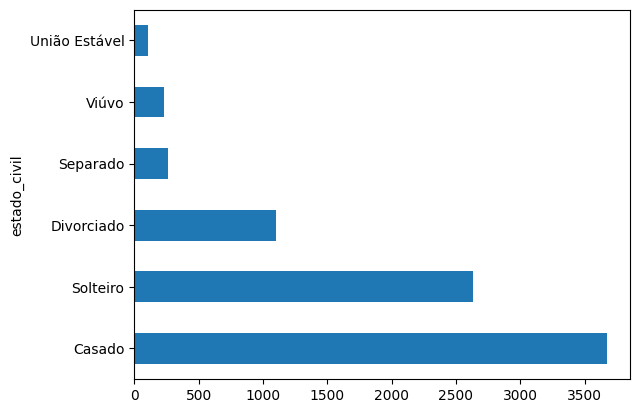

In [14]:
#@title 1.10.2) Visualização da frequência
contagem_categorica.plot.barh()

In [15]:
#@title 1.10.3) Tabela cruzada
#tabela cruzada com outra variável categórica "Região"
pd.crosstab(df['estado_civil'], df['região'])

região,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
estado_civil,,,,,
Casado,536,1268,951,522,394
Divorciado,160,370,282,173,116
Separado,35,85,68,39,33
Solteiro,400,838,681,409,302
União Estável,18,41,28,11,9
Viúvo,39,64,63,30,34


In [16]:
#@title 1.10.4) Agregação de Dados
#media das idades por estado civil
df_agregado = df.groupby('estado_civil')['idade']

In [17]:
#@title 1.10.4.1) Mínima
df_agregado.min()

,idade
estado_civil,
Casado,17
Divorciado,18
Separado,20
Solteiro,17
União Estável,19
Viúvo,22


In [18]:
#@title 1.10.4.1) Média
df_agregado.mean()

,idade
estado_civil,
Casado,43.163716
Divorciado,42.641235
Separado,39.392308
Solteiro,28.243346
União Estável,39.728972
Viúvo,59.143478


In [19]:
#@title 1.10.4.1) Máxima
df_agregado.max()

,idade
estado_civil,
Casado,90
Divorciado,81
Separado,90
Solteiro,90
União Estável,77
Viúvo,90


In [20]:
#@title 1.11.0) Dados duplicados

In [21]:
#@title 1.11.1) Visualizado dados duplicados
df[df.duplicated()]

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
859,17,Menor Aprendiz,Ensino Médio Incompleto,7,Solteiro,Branco,Masculino,RR,Norte,0.0,1100
1369,54,Funcionário Setor Privado,Ensino Médio Incompleto,9,Casado,Branco,Masculino,RO,Norte,1.0,1100
1711,38,Funcionário Setor Privado,Ensino Médio Incompleto,9,Casado,Branco,Masculino,RJ,Sudeste,5.0,1100
2196,31,Funcionário Setor Privado,Ensino Médio Incompleto,9,Separado,Branco,Feminino,ES,Sudeste,4.0,1100
2252,25,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Branco,Masculino,SP,Sudeste,2.0,1100
...,...,...,...,...,...,...,...,...,...,...,...
7822,23,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Branco,Masculino,RR,Norte,1.0,1100
7853,36,Funcionário Setor Privado,Ensino Médio Incompleto,9,Casado,Branco,Masculino,MA,Nordeste,2.0,1100
7905,28,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Branco,Masculino,AP,Norte,4.0,1100
7910,29,Funcionário Setor Privado,Ensino Médio Incompleto,9,Casado,Branco,Masculino,RN,Nordeste,4.0,1100


In [22]:
#@title 1.11.1) Removendo dados duplicados
df.drop_duplicates(inplace=True)

In [23]:
#@title 1.11.2) Verificação de dados removidos
df.shape

(7933, 11)

In [24]:
#@title 1.12.0) Verificação de dados ausentes

In [25]:
#@title 1.12.1) Visualizado dados ausentes
df.isnull().sum()

,0
idade,0
classe_trabalho,387
escolaridade,0
anos_estudo,0
estado_civil,0
raca,0
sexo,0
UF,0
região,0
qtde_filhos,2


In [26]:
#@1.12.2) Variável classe de trabalho
df[df['classe_trabalho'].isna()]

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
61,32,NaN,Ensino Fundamental Incompleto,4,União Estável,Branco,Masculino,MA,Nordeste,4.0,1100
69,25,NaN,Ensino Médio Completo,10,Solteiro,Branco,Masculino,BA,Nordeste,3.0,3450
127,35,NaN,Ensino Médio Incompleto,9,Casado,Amarelo,Masculino,PR,Sul,4.0,1100
148,43,NaN,Ensino Médio Completo,10,Divorciado,Branco,Feminino,SE,Nordeste,0.0,2490
153,52,NaN,Ensino Médio Incompleto,9,Divorciado,Branco,Masculino,SP,Sudeste,1.0,1100
...,...,...,...,...,...,...,...,...,...,...,...
7931,51,NaN,Ensino Médio Completo,10,Divorciado,Branco,Feminino,PA,Norte,2.0,2660
7952,19,NaN,Ensino Médio Completo,10,Solteiro,Branco,Feminino,GO,Centro-Oeste,0.0,2581
7960,30,NaN,Ensino Fundamental Completo,5,Solteiro,Branco,Feminino,TO,Norte,4.0,1100
7988,20,NaN,Ensino Médio Completo,10,Solteiro,Branco,Masculino,MA,Nordeste,2.0,3610


In [27]:
#@1.12.3) Variável quantidade de filhos
df.query('qtde_filhos.isna()')

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
12,23,Funcionário Setor Privado,Pós-Graduado,13,Solteiro,Branco,Feminino,PE,Nordeste,NaN,5316
20,40,Funcionário Setor Privado,Doutorado,16,Casado,Branco,Masculino,PR,Sul,NaN,12535


In [28]:
#@1.12.3) Variável salário
df.query('salario.isna()')

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario


In [29]:
#@1.12.4) Pessoas de 20 anos solteiras que residem em Minas Gerais
df.query('idade == 20 and estado_civil == "Solteiro" and UF == "MG"')

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
656,20,Funcionário Setor Privado,Ensino Médio Completo,10,Solteiro,Branco,Feminino,MG,Sudeste,2.0,3021
1304,20,NaN,Ensino Médio Completo,10,Solteiro,Branco,Feminino,MG,Sudeste,1.0,2500
2249,20,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Branco,Feminino,MG,Sudeste,2.0,1100
2842,20,Servidor Público,Ensino Médio Completo,10,Solteiro,Branco,Feminino,MG,Sudeste,0.0,4518
3355,20,Funcionário Setor Privado,Ensino Médio Completo,10,Solteiro,Branco,Feminino,MG,Sudeste,2.0,3564
3382,20,Funcionário Setor Privado,Ensino Médio Completo,10,Solteiro,Branco,Feminino,MG,Sudeste,1.0,2314
3976,20,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Negro,Masculino,MG,Sudeste,2.0,1100
7619,20,Funcionário Setor Privado,Ensino Fundamental Completo,6,Solteiro,Branco,Masculino,MG,Sudeste,2.0,1100
7997,20,Funcionário Setor Privado,Ensino Médio Incompleto,9,Solteiro,Negro,Masculino,MG,Sudeste,0.0,1100


In [30]:
#@1.12.5) Média de idade dos solteiras que residem em Minas Gerais
df.query('estado_civil == "Solteiro" and UF == "MG"')['idade'].mean()

28.216494845360824

In [31]:
#@title 1.13.0) Correção de dados ausentes

In [37]:
#@title 1.13.1) Correção para a variável "Classe de Trabalho"
moda = df['classe_trabalho'].mode()[0]
print(f'A moda é: {moda}')
df['classe_trabalho'].fillna(moda, inplace=True)

A moda é: Funcionário Setor Privado


In [38]:
#@title 1.13.2 Checando a correção da variável "Classe de Trabalho"
#na seção 1.12.2 estas linhas estavam com a coluna "Classe de Trabalho" definido como NaN
df.query('index in (61, 69)')

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario
61,32,Funcionário Setor Privado,Ensino Fundamental Incompleto,4,União Estável,Branco,Masculino,MA,Nordeste,4.0,1100
69,25,Funcionário Setor Privado,Ensino Médio Completo,10,Solteiro,Branco,Masculino,BA,Nordeste,3.0,3450


In [39]:
#@title 1.13.3 Correção da variãvel "Quantidade de Filhos"
df.dropna(subset=['qtde_filhos'], inplace=True)

In [40]:
#@title 1.13.4 Checando a correção da variável "Quantidade de Filhos"
#na seção 1.12.3 estas linhas estavam com a coluna "Quantidade de Filhos" definido como NaN
df.query('index in (12, 20)')

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario


In [45]:
#@title 1.13.5 Corrigindo variável "Salário"
media_salario = round(df['salario'].mean(), 2)
print(f'A média é: {media_salario}')
df['salario'] = df['salario'].fillna(media_salario)

A média é: 3185.08


In [46]:
#@title 1.13.6 Checando variável "Salário"
#Não foi apresentado coluna com salário null deste dataset conforme pode ser visto na seção 1.4
df.query('salario.isnull()')

,idade,classe_trabalho,escolaridade,anos_estudo,estado_civil,raca,sexo,UF,região,qtde_filhos,salario


In [47]:
#@title 1.13.7 Análise dos dados após correção dos dados ausentes
df.isna().sum()

,0
idade,0
classe_trabalho,0
escolaridade,0
anos_estudo,0
estado_civil,0
raca,0
sexo,0
UF,0
região,0
qtde_filhos,0


In [48]:
#@title 1.14.0 Visualização gráfica dos dados

In [49]:
#@title 1.14.1 Quais as colunas do meu dataset
df.columns

Index(['idade', 'classe_trabalho', 'escolaridade', 'anos_estudo',
       'estado_civil', 'raca', 'sexo', 'UF', 'região', 'qtde_filhos',
       'salario'],
      dtype='object')

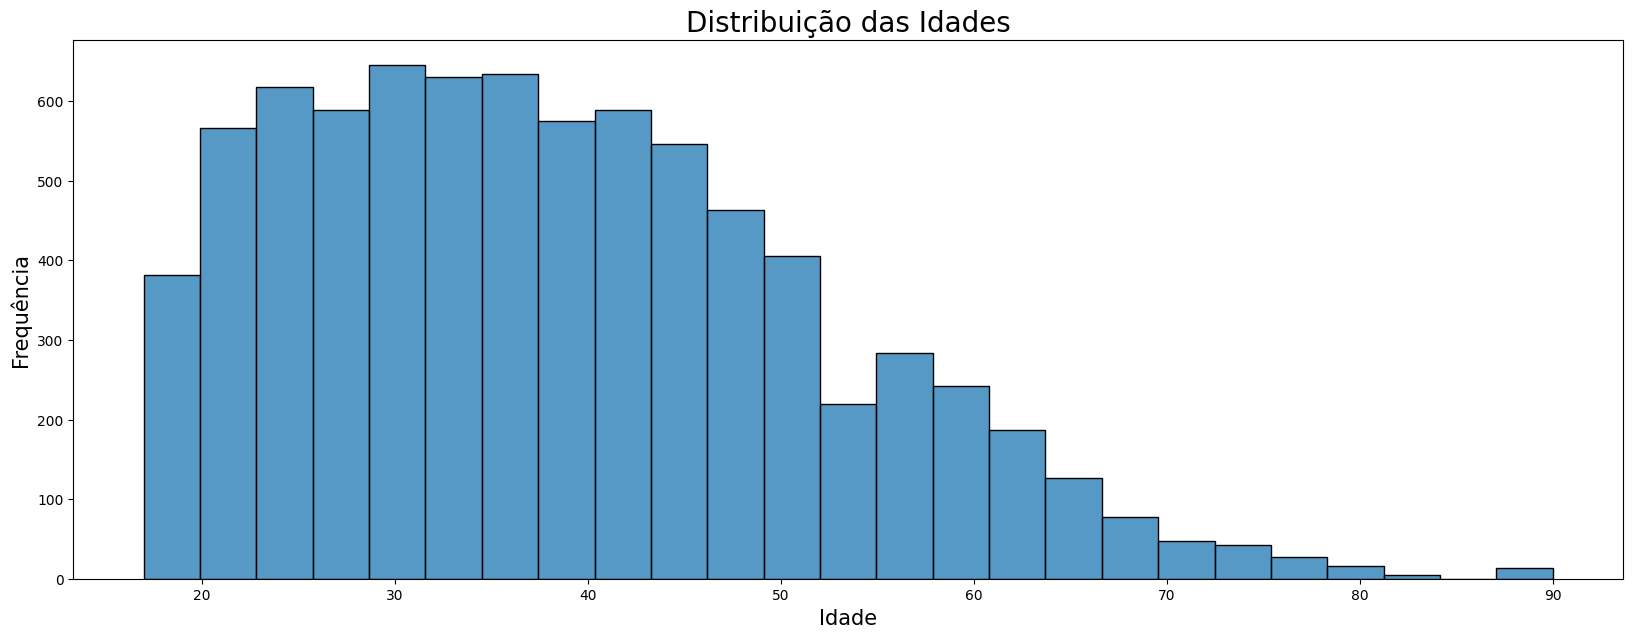

In [51]:
#@title 1.14.2 Histograma por idade
plt.figure(figsize=(20, 7))
plt.title('Distribuição das Idades', size=20)
plt.ylabel('Frequência', size=15)
plt.xlabel('Idade', size=15)
sns.histplot(data=df, #dataset
             x='idade', #coluna do dataset
             bins=25) #quantidade de colunas
plt.show()

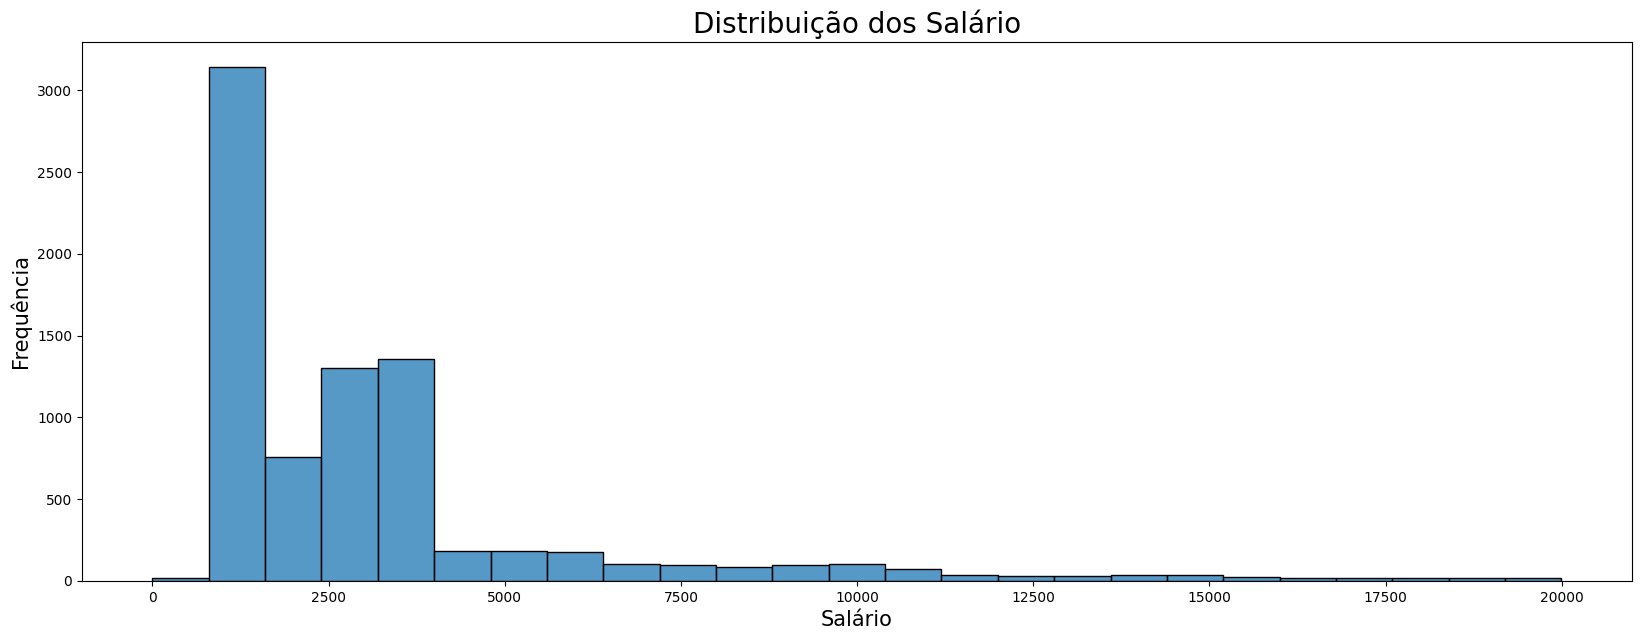

In [52]:
#@title 1.14.3 Histograma por salário
plt.figure(figsize=(20, 7))
plt.title('Distribuição dos Salário', size=20)
plt.ylabel('Frequência', size=15)
plt.xlabel('Salário', size=15)
sns.histplot(data=df, #dataset
             x='salario', #coluna do dataset
             bins=25) #quantidade de colunas
plt.show()

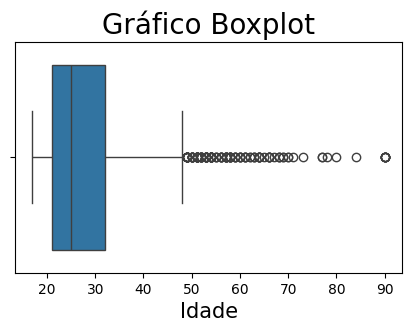

In [53]:
#@title 1.14.4 Boxplot
plt.figure(figsize=(5, 3))
plt.title('Gráfico Boxplot', size=20)
plt.xlabel('Idade', size=15)
sns.boxplot(data=df.query('estado_civil == "Solteiro"'), #dataset
            x='idade', #coluna do dataset
            orient='h') #orientação do gráfico
plt.show()

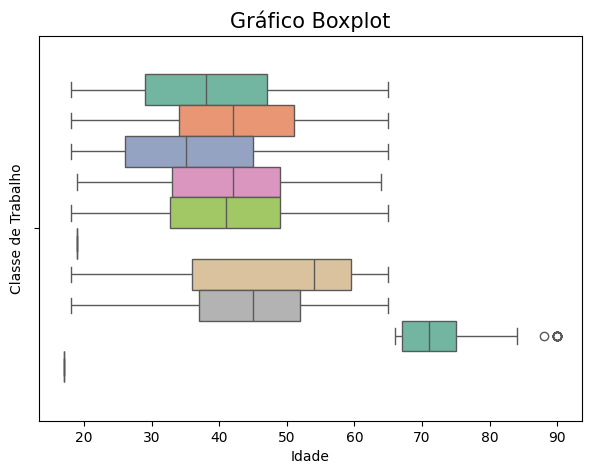

In [54]:
#@title 1.14.5 Boxplot com multiplas categorias
plt.figure(figsize=(7, 5))
plt.title('Gráfico Boxplot', size=15)
plt.xlabel('Idade', size=10)
plt.ylabel('Classe de Trabalho', size=10)
sns.boxplot(data=df, #dataset
            x='idade', #coluna do dataset
            hue='classe_trabalho', #coluna do dataset
            orient='h', #orientação do gráfico
            legend=False, #legenda do gráfico
            palette='Set2') #paleta de cores
plt.show()

In [55]:
#@title 1.15.0 Gráfico de dispersão
media_estudo = pd.DataFrame(df.groupby('anos_estudo')['salario'].mean())
media_estudo.reset_index(inplace=True)
media_estudo

,anos_estudo,salario
0,1,2523.818182
1,2,1140.729730
2,3,1757.597015
3,4,1743.445122
4,5,2112.407692
5,6,1578.837607
6,7,1593.420339
7,8,1669.918605
8,9,1761.087594
9,10,3563.754727


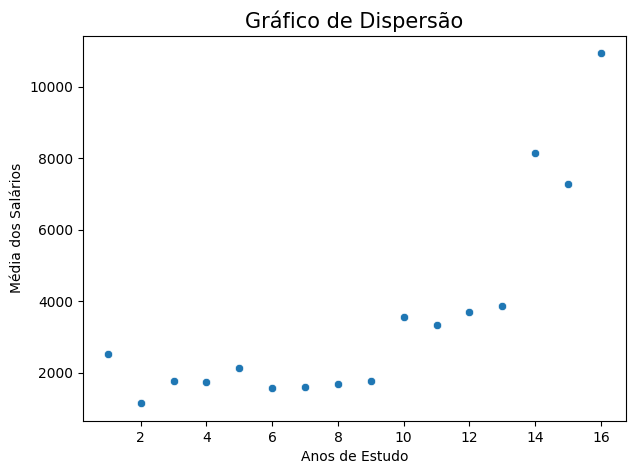

In [57]:
plt.figure(figsize=(7, 5))
plt.title('Gráfico de Dispersão', size=15)
plt.xlabel('Anos de Estudo', size=10)
plt.ylabel('Média dos Salários', size=10)
sns.scatterplot(data=media_estudo, #dataset
                x='anos_estudo', #coluna do dataset
                y='salario') #coluna do dataset
plt.show()

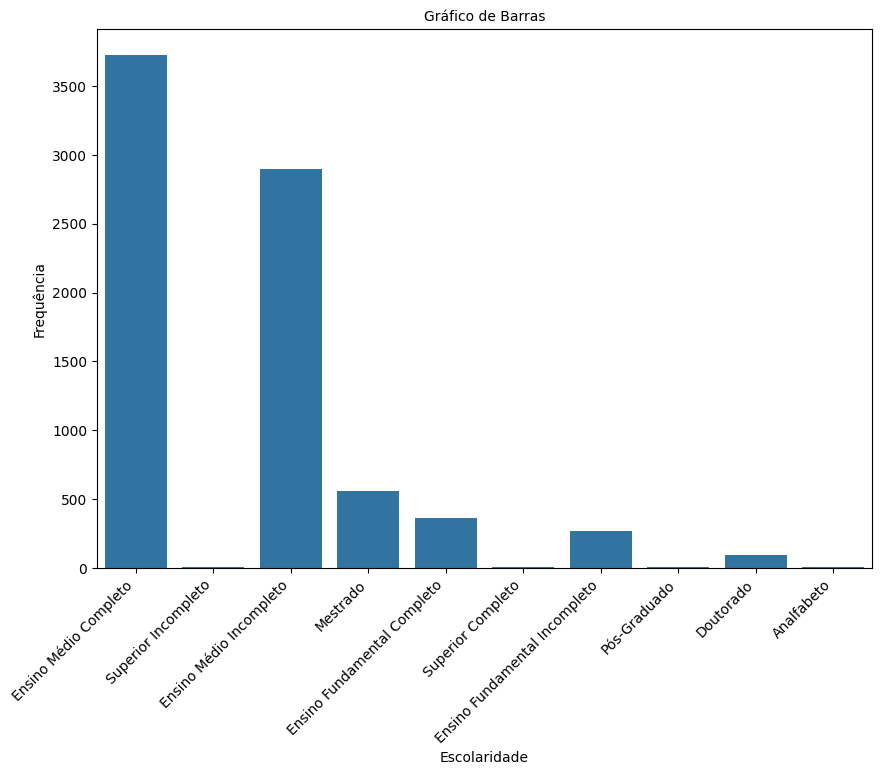

In [58]:
#@title 1.14.6) Gráfico de Barras
plt.figure(figsize=(10, 7))
plt.title('Gráfico de Barras', size=10)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Escolaridade', size=10)
plt.ylabel('Frequência', size=10)
sns.countplot(data=df, #dataset
             x='escolaridade') #coluna do dataset
plt.show()

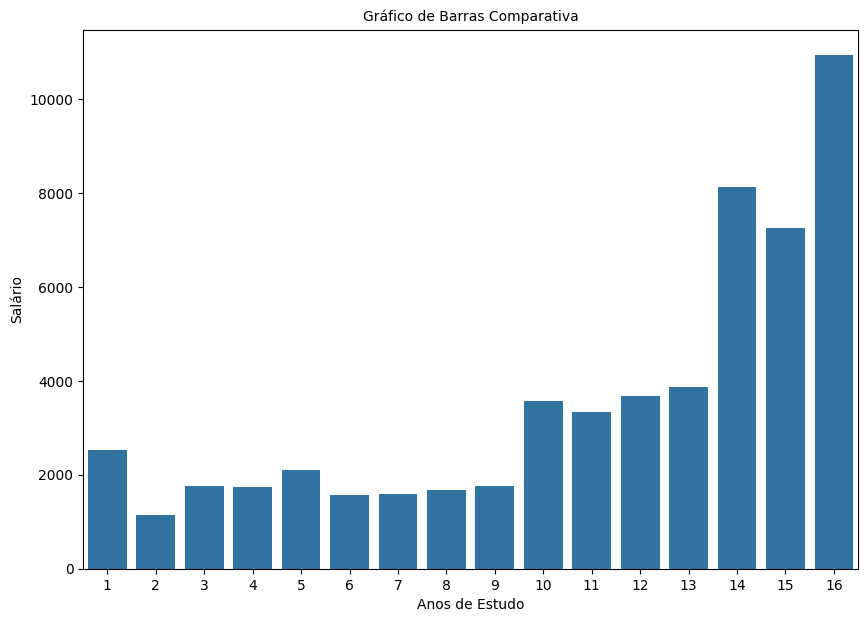

In [59]:
#@title 1.14.7 Análise comparativa de gráfico de barras
plt.figure(figsize=(10, 7))
plt.title('Gráfico de Barras Comparativa', size=10)
plt.xlabel('Anos de Estudo', size=10)
plt.ylabel('Salário', size=10)
sns.barplot(data=media_estudo, #dataset
            x='anos_estudo', #coluna do dataset
            y='salario') #coluna do dataset
plt.show()

In [60]:
#@title 1.14.8 Explorando relação de correlações entre variáveis
colunas = ['idade', 'salario', 'qtde_filhos', 'anos_estudo']
dados_correlacao = round(df[colunas].corr(), 2)
dados_correlacao

,idade,salario,qtde_filhos,anos_estudo
idade,1.00,0.11,0.09,0.03
salario,0.11,1.00,0.00,0.46
qtde_filhos,0.09,0.00,1.00,0.04
anos_estudo,0.03,0.46,0.04,1.00


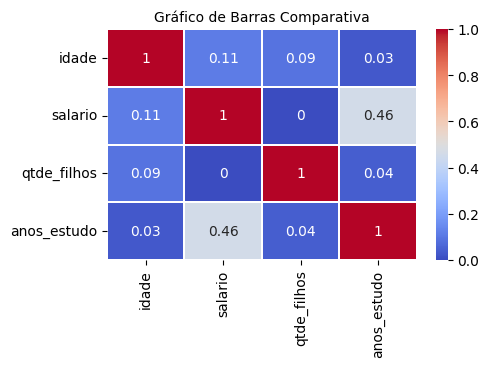

In [61]:
plt.figure(figsize=(5, 3))
plt.title('Gráfico de Barras Comparativa', size=10)
sns.heatmap(data=dados_correlacao,
            cmap='coolwarm',
            annot=True,
            linewidths=0.1,
            linecolor='white')
plt.show()

In [62]:
#@title 1.15.0 Agregação
df.groupby(['região', 'sexo']).agg(
    total=('sexo', 'count'),
    media_idade=('idade', 'mean'),
    media_salario=('salario', 'mean'))

total  media_idade  media_salario
região       sexo                                        
Centro-Oeste Feminino     398    36.683417    3013.753769
             Masculino    781    39.366197    3232.503201
Nordeste     Feminino     862    37.397912    3070.590487
             Masculino   1779    39.354694    3279.187184
Norte        Feminino     673    36.958395    3197.102526
             Masculino   1388    39.291066    3149.845821
Sudeste      Feminino     403    36.037221    2864.665012
             Masculino    771    38.715953    3165.447471
Sul          Feminino     279    38.017921    3478.491039
             Masculino    597    39.698492    3295.048576